c:\Users\PC\anaconda3\envs\rag\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (2202 > 256). Running this sequence through the model will result in indexing errors


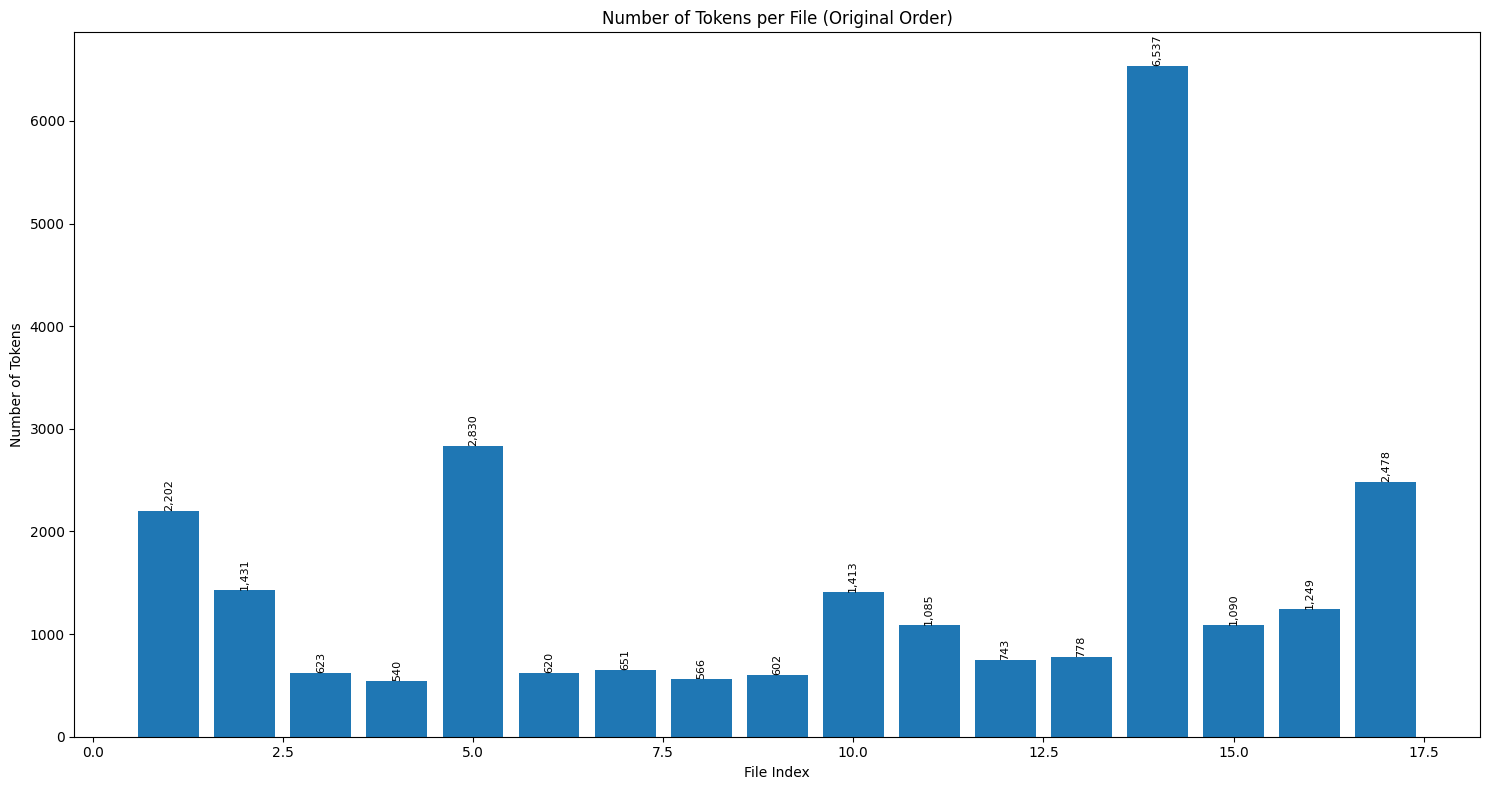

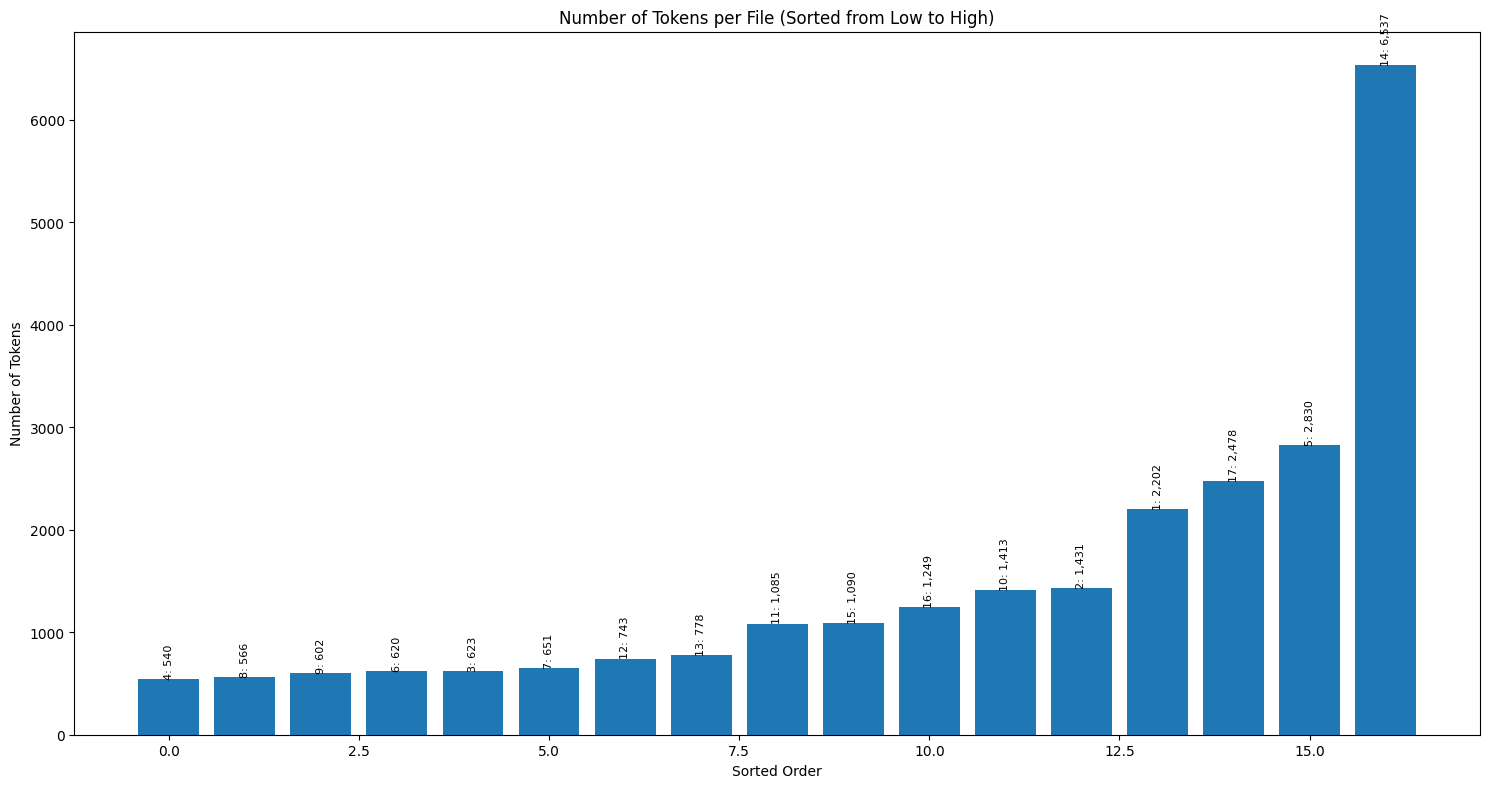

    index                                           filename  num_tokens
0       1  Chương trình đào tạo kỹ sư chuyên sâu đặc thù ...        2202
1       2                                 hướng dẫn BHYT.txt        1431
2       3  Hướng dẫn chụp, công chứng và rút học bạ trong...         623
3       4   Hướng dẫn hoc chuyen tiep ky su 180 TC_Final.txt         540
4       5  Hướng dẫn Hồ sơ chế độ chính sách miễn giảm họ...        2830
5       6     Hướng dẫn làm thủ tục thanh toán ra Trường.txt         620
6       7  Hướng dẫn sử dụng phần mềm Office 365 và học t...         651
7       8        Hướng dẫn sử dụng Thư viện Tạ Quang Bửu.txt         566
8       9  Hướng dẫn thủ tục, biểu mẫu, thắc mắc về học t...         602
9      10   Hướng dẫn tổ chức đánh giá kết quả rèn luyện.txt        1413
10     11                         Học bổng cho sinh viên.txt        1085
11     12  Quy định chuẩn ngoại ngữ đầu ra đối với các ch...         743
12     13  Quy định về chuẩn tiếng anh theo trình đ

In [3]:
import os
import glob
import pandas as pd
import tiktoken
from langchain.document_loaders import TextLoader, PyPDFLoader
import matplotlib.pyplot as plt
DATA_PATH = r'D:\DATN\data\hust'
def load_and_count_tokens(path=DATA_PATH):
    data = []
    
    # Đọc file txt
    txt_files = glob.glob(f'{path}/*.txt')
    for txt in txt_files:
        loader = TextLoader(txt, autodetect_encoding=True)
        content = ' '.join([doc.page_content for doc in loader.load()])
        num_tokens = num_tokens_from_string(content, tokenizer= tokenizer)
        data.append({
            'filename': os.path.basename(txt),
            'file_type': 'txt',
            'num_tokens': num_tokens
        })
    
    # Đọc file pdf
    pdf_files = glob.glob(f'{path}/*.pdf')
    for pdf in pdf_files:
        loader = PyPDFLoader(pdf)
        content = ' '.join([doc.page_content for doc in loader.load()])
        num_tokens = num_tokens_from_string(content, tokenizer= tokenizer)
        data.append({
            'filename': os.path.basename(pdf),
            'file_type': 'pdf',
            'num_tokens': num_tokens
        })
    
    return pd.DataFrame(data)
from transformers import AutoTokenizer
def load_tokenizer(tokenizer_model: str = "keepitreal/vietnamese-sbert"):
    """
    Hàm tải và khởi tạo tokenizer.
    
    Tham số:
    - tokenizer_model: Tên mô hình tokenizer. Mặc định là "keepitreal/vietnamese-sbert".
    
    Trả về: Đối tượng tokenizer.
    """
    return AutoTokenizer.from_pretrained(tokenizer_model)
# Tải tokenizer PhoBERT
tokenizer = load_tokenizer() 
def num_tokens_from_string(string: str, tokenizer) -> int:
    """Returns the number of tokens in a text string using the provided tokenizer."""
    num_tokens = len(tokenizer.encode(string))
    return num_tokens
# def num_tokens_from_string(string: str, encoding_name: str) -> int:
#     """Returns the number of tokens in a text string."""
#     encoding = tiktoken.get_encoding(encoding_name)
#     num_tokens = len(encoding.encode(string))
#     return num_tokens

# Tạo DataFrame
df = load_and_count_tokens()

# Thêm cột index
df['index'] = range(1, len(df) + 1)

# Biểu đồ 1: Hiển thị số token theo thứ tự ban đầu
plt.figure(figsize=(15, 8))
bars = plt.bar(df['index'], df['num_tokens'])
plt.title('Number of Tokens per File (Original Order)')
plt.xlabel('File Index')
plt.ylabel('Number of Tokens')

for i, bar in enumerate(bars):
    token_count = df['num_tokens'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{token_count:,}',
             ha='center', va='bottom',
             rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# Biểu đồ 2: Sắp xếp số token từ thấp đến cao
df_sorted = df.sort_values('num_tokens')
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(df_sorted)), df_sorted['num_tokens'])
plt.title('Number of Tokens per File (Sorted from Low to High)')
plt.xlabel('Sorted Order')
plt.ylabel('Number of Tokens')

for i, bar in enumerate(bars):
    index = df_sorted['index'].iloc[i]
    token_count = df_sorted['num_tokens'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{index}: {token_count:,}',
             ha='center', va='bottom',
             rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# In bảng ánh xạ giữa index và tên file đầy đủ
print(df[['index', 'filename', 'num_tokens']])

# Thống kê theo loại file
print(df.groupby('file_type')['num_tokens'].agg(['mean', 'min', 'max', 'sum']))

In [4]:
display(df_sorted)

,filename,file_type,num_tokens,index
3,Hướng dẫn hoc chuyen tiep ky su 180 TC_Final.txt,txt,540,4
7,Hướng dẫn sử dụng Thư viện Tạ Quang Bửu.txt,txt,566,8
8,"Hướng dẫn thủ tục, biểu mẫu, thắc mắc về học t...",txt,602,9
5,Hướng dẫn làm thủ tục thanh toán ra Trường.txt,txt,620,6
2,"Hướng dẫn chụp, công chứng và rút học bạ trong...",txt,623,3
6,Hướng dẫn sử dụng phần mềm Office 365 và học t...,txt,651,7
11,Quy định chuẩn ngoại ngữ đầu ra đối với các ch...,txt,743,12
12,Quy định về chuẩn tiếng anh theo trình độ và c...,txt,778,13
10,Học bổng cho sinh viên.txt,txt,1085,11
14,Thông báo tuyển sinh trình độ thạc sĩ năm 2024...,txt,1090,15


In [5]:
df_sorted.to_csv('new_output.csv', index=False, encoding='utf-8')

c:\Users\PC\anaconda3\envs\raptop_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\PC\anaconda3\envs\raptop_env\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


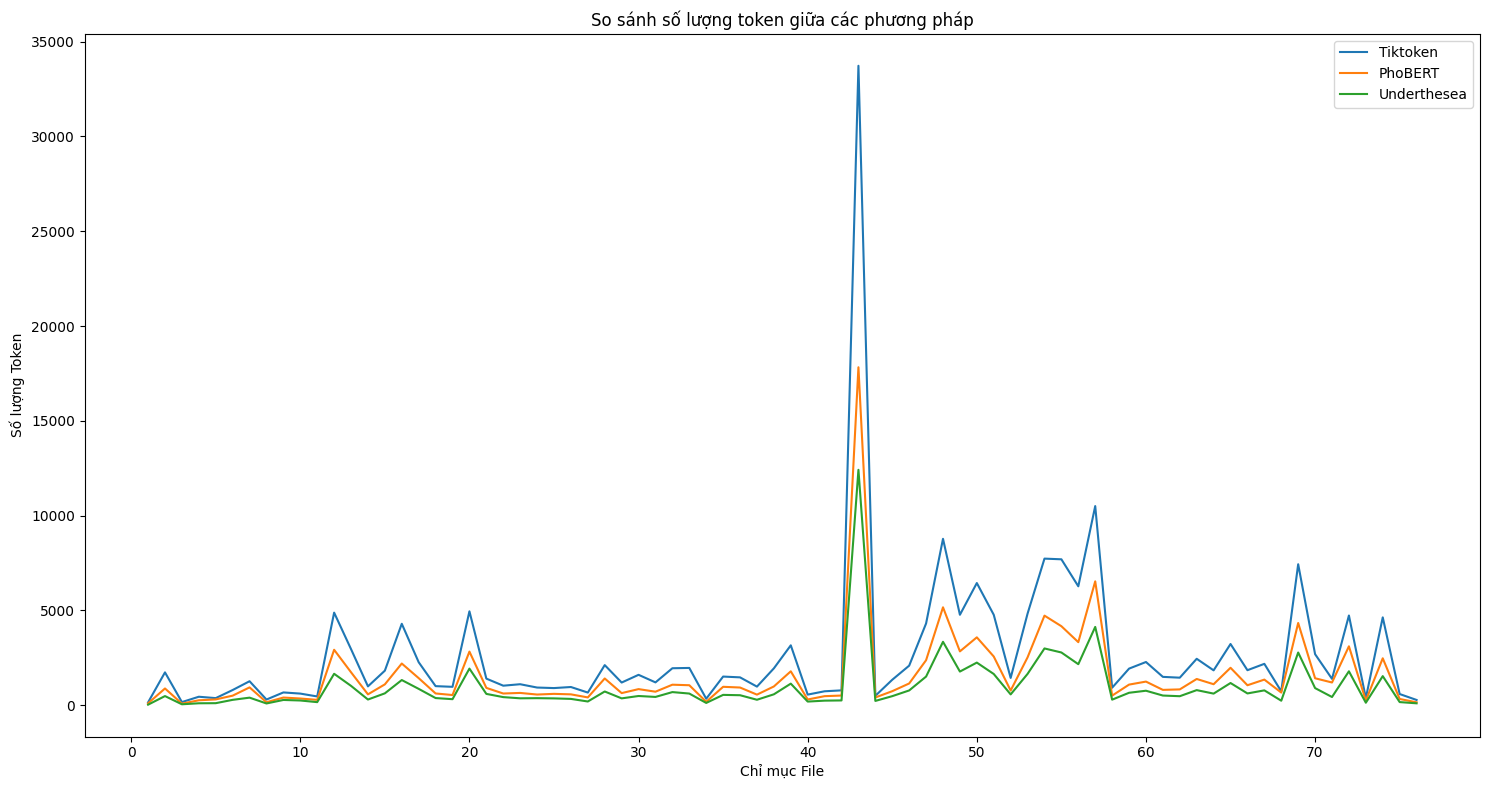

    index                                           filename  tiktoken_count  \
0       1                           Ban giám đốc Đại học.txt             153   
1       2  Chiến lược phát triển đại học Bách khoa Hà Nội...            1735   
2       3                          Các giai đoạn lịch sử.txt             168   
3       4  Các tổ chức đoàn thể Trường Công nghệ Thông ti...             450   
4       5                           Các tổ chức đoàn thể.txt             377   
5       6           Câu lạc bộ An toàn thông tin (BKSec).txt             804   
6       7                           Câu lạc bộ sinh viên.txt            1268   
7       8  Cơ cấu tổ chức Trường Công nghệ Thông tin và T...             302   
8       9  Cấp giấy tờ cho sinh viên (Giấy giới thiệu, gi...             677   
9      10  Cấp giấy tờ cho sinh viên Giấy giới thiệu, giấ...             616   
10     11                        Danh hiệu - khen thưởng.txt             465   
11     12              Giới thiệu Khoa K

In [14]:
import os
import glob
import pandas as pd
import tiktoken
from langchain.document_loaders import TextLoader, PyPDFLoader
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from underthesea import word_tokenize as vietnamese_word_tokenize

DATA_PATH = 'D:\DATN\data\hust'

def load_documents(path=DATA_PATH):
    documents = []
    
    # Đọc file txt
    txt_files = glob.glob(f'{path}/*.txt')
    for txt in txt_files:
        loader = TextLoader(txt, encoding='utf-8')
        content = ' '.join([doc.page_content for doc in loader.load()])
        documents.append({
            'filename': os.path.basename(txt),
            'file_type': 'txt',
            'content': content
        })
    
    # Đọc file pdf
    pdf_files = glob.glob(f'{path}/*.pdf')
    for pdf in pdf_files:
        loader = PyPDFLoader(pdf)
        content = ' '.join([doc.page_content for doc in loader.load()])
        documents.append({
            'filename': os.path.basename(pdf),
            'file_type': 'pdf',
            'content': content
        })
    
    return documents

def count_tokens_tiktoken(text: str, encoding_name: str = "cl100k_base") -> int:
    encoding = tiktoken.get_encoding(encoding_name)
    return len(encoding.encode(text))

def count_tokens_phobert(text: str) -> int:
    tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
    return len(tokenizer.encode(text))

def count_tokens_underthesea(text: str) -> int:
    return len(vietnamese_word_tokenize(text))

def analyze_documents(documents):
    results = []
    for doc in documents:
        tiktoken_count = count_tokens_tiktoken(doc['content'])
        phobert_count = count_tokens_phobert(doc['content'])
        underthesea_count = count_tokens_underthesea(doc['content'])
        
        results.append({
            'filename': doc['filename'],
            'file_type': doc['file_type'],
            'tiktoken_count': tiktoken_count,
            'phobert_count': phobert_count,
            'underthesea_count': underthesea_count
        })
    
    return pd.DataFrame(results)

# Tải và phân tích tài liệu
documents = load_documents()
df = analyze_documents(documents)

# Thêm cột index
df['index'] = range(1, len(df) + 1)

# Vẽ biểu đồ so sánh các phương pháp đếm token
plt.figure(figsize=(15, 8))
plt.plot(df['index'], df['tiktoken_count'], label='Tiktoken')
plt.plot(df['index'], df['phobert_count'], label='PhoBERT')
plt.plot(df['index'], df['underthesea_count'], label='Underthesea')
plt.title('So sánh số lượng token giữa các phương pháp')
plt.xlabel('Chỉ mục File')
plt.ylabel('Số lượng Token')
plt.legend()
plt.tight_layout()
plt.show()

# In bảng so sánh
print(df[['index', 'filename', 'tiktoken_count', 'phobert_count', 'underthesea_count']])

# Thống kê theo loại file và phương pháp đếm token
for method in ['tiktoken_count', 'phobert_count', 'underthesea_count']:
    print(f"\nThống kê cho {method}:")
    print(df.groupby('file_type')[method].agg(['mean', 'min', 'max', 'sum']))

c:\Users\PC\anaconda3\envs\raptop_env\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


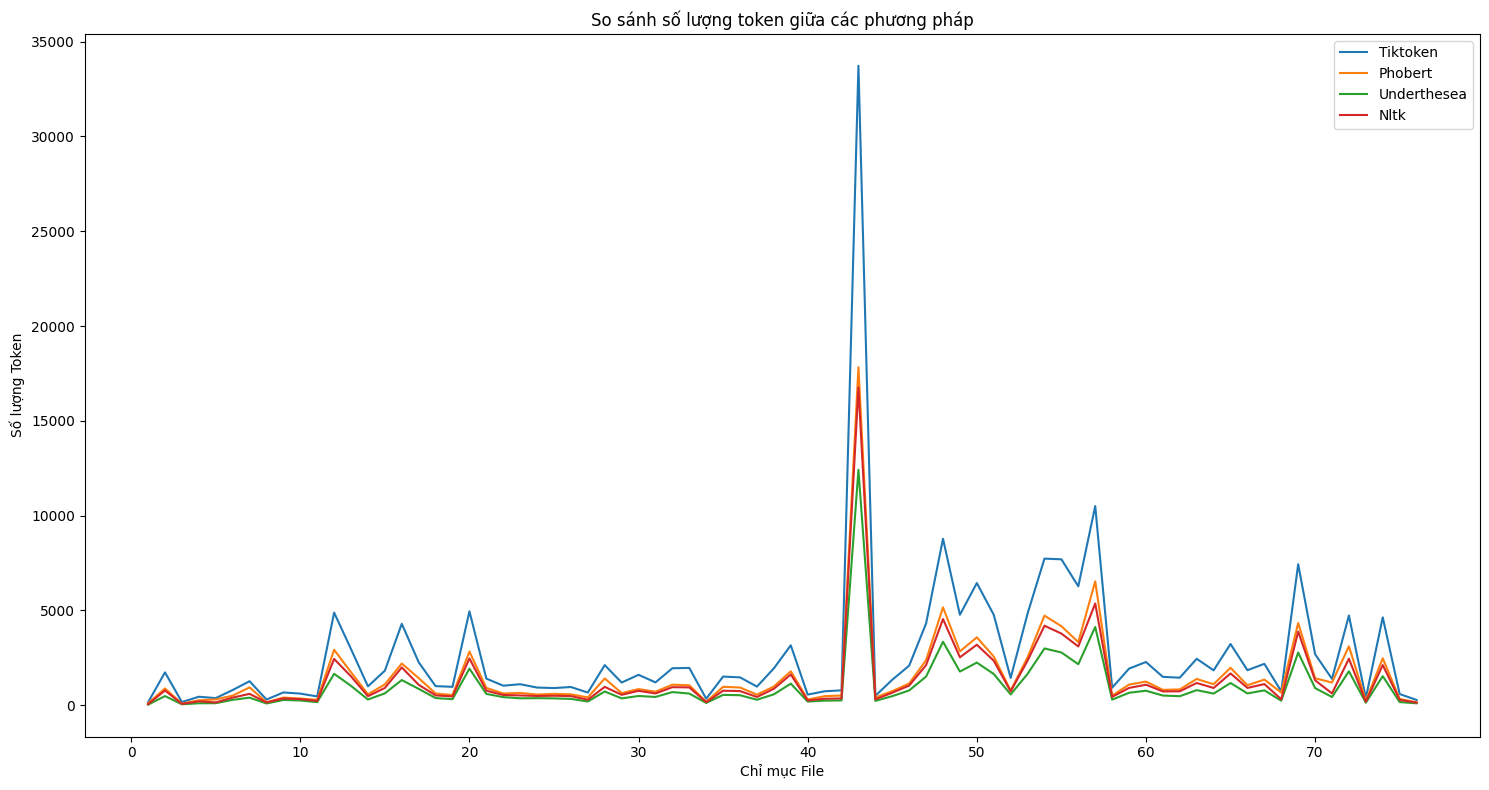

    index                                           filename  tiktoken_count  \
0       1                           Ban giám đốc Đại học.txt             153   
1       2  Chiến lược phát triển đại học Bách khoa Hà Nội...            1735   
2       3                          Các giai đoạn lịch sử.txt             168   
3       4  Các tổ chức đoàn thể Trường Công nghệ Thông ti...             450   
4       5                           Các tổ chức đoàn thể.txt             377   
..    ...                                                ...             ...   
71     72  [Ban Đào tạo] Hướng dẫn thủ tục, biểu mẫu, thắ...            4735   
72     73  Đào tạo ngắn hạn Trường Công nghệ Thông tin và...             380   
73     74  Đào tạo Đại học theo hình thức vừa làm vừa học...            4637   
74     75                         Đảng ủy Trường CNTT&TT.txt             593   
75     76                                 Đội ngũ cán bộ.txt             280   

    phobert_count  underthesea_count  n

KeyError: 'num_tokens'

In [8]:
import os
import glob
import pandas as pd
import tiktoken
from langchain.document_loaders import TextLoader, PyPDFLoader
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from underthesea import word_tokenize as underthesea_tokenize
import nltk
from nltk.tokenize import word_tokenize as nltk_tokenize

DATA_PATH = 'D:\DATN\data\hust'

# Khởi tạo các tokenizer
phobert_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
nltk.download('punkt', quiet=True)

def load_documents(path=DATA_PATH):
    documents = []
    
    # Đọc file txt
    txt_files = glob.glob(f'{path}/*.txt')
    for txt in txt_files:
        loader = TextLoader(txt, encoding='utf-8')
        content = ' '.join([doc.page_content for doc in loader.load()])
        documents.append({
            'filename': os.path.basename(txt),
            'file_type': 'txt',
            'content': content
        })
    
    # Đọc file pdf
    pdf_files = glob.glob(f'{path}/*.pdf')
    for pdf in pdf_files:
        loader = PyPDFLoader(pdf)
        content = ' '.join([doc.page_content for doc in loader.load()])
        documents.append({
            'filename': os.path.basename(pdf),
            'file_type': 'pdf',
            'content': content
        })
    
    return documents

def count_tokens_tiktoken(text: str, encoding_name: str = "cl100k_base") -> int:
    encoding = tiktoken.get_encoding(encoding_name)
    return len(encoding.encode(text))

def count_tokens_phobert(text: str) -> int:
    return len(phobert_tokenizer.encode(text))

def count_tokens_underthesea(text: str) -> int:
    return len(underthesea_tokenize(text))

def count_tokens_nltk(text: str) -> int:
    return len(nltk_tokenize(text))

def analyze_documents(documents):
    results = []
    for doc in documents:
        tiktoken_count = count_tokens_tiktoken(doc['content'])
        phobert_count = count_tokens_phobert(doc['content'])
        underthesea_count = count_tokens_underthesea(doc['content'])
        nltk_count = count_tokens_nltk(doc['content'])
        
        results.append({
            'filename': doc['filename'],
            'file_type': doc['file_type'],
            'tiktoken_count': tiktoken_count,
            'phobert_count': phobert_count,
            'underthesea_count': underthesea_count,
            'nltk_count': nltk_count
        })
    
    return pd.DataFrame(results)

# Tải và phân tích tài liệu
documents = load_documents()
df = analyze_documents(documents)
# Thêm cột index
df['index'] = range(1, len(df) + 1)

# Vẽ biểu đồ so sánh các phương pháp đếm token
plt.figure(figsize=(15, 8))
methods = ['tiktoken', 'phobert', 'underthesea', 'nltk']
for method in methods:
    plt.plot(df['index'], df[f'{method}_count'], label=method.capitalize())

plt.title('So sánh số lượng token giữa các phương pháp')
plt.xlabel('Chỉ mục File')
plt.ylabel('Số lượng Token')
plt.legend()
plt.tight_layout()
plt.show()

# In bảng so sánh
print(df[['index', 'filename'] + [f'{method}_count' for method in methods]])

# Thống kê theo loại file và phương pháp đếm token
for method in methods:
    print(f"\nThống kê cho {method}:")
    print(df.groupby('file_type')[f'{method}_count'].agg(['mean', 'min', 'max', 'sum']))


In [9]:
df_sorted = df.sort_values('phobert_count',ascending=True)
df_sorted.to_csv('output.csv', index=False, encoding='utf-8')

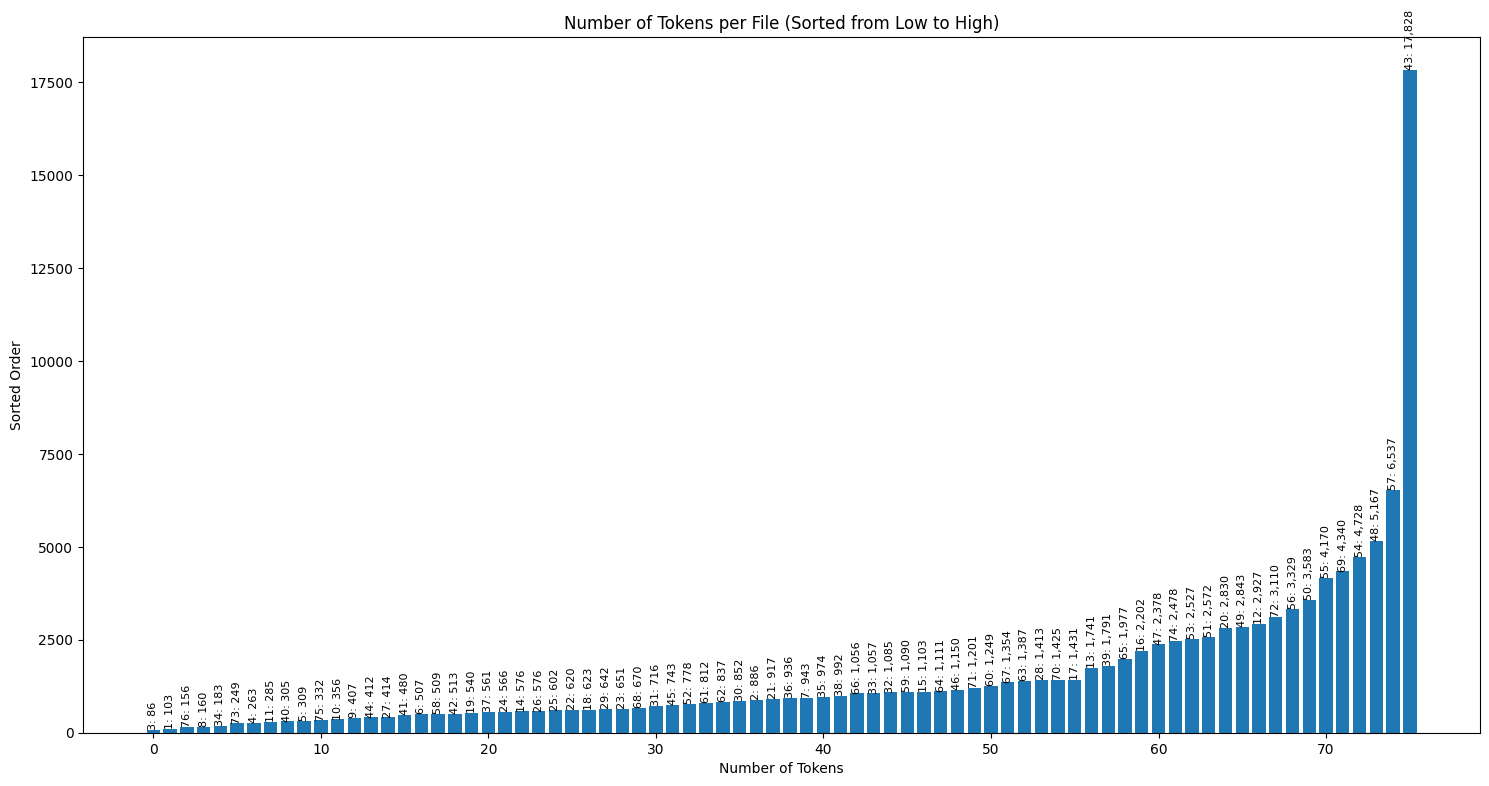

In [14]:
# Biểu đồ 2: Sắp xếp số token từ thấp đến cao
df_sorted = df.sort_values('phobert_count')
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(df_sorted)), df_sorted['phobert_count'])
plt.title('Number of Tokens per File (Sorted from Low to High)')
plt.xlabel('Sorted Order')
plt.ylabel('Number of Tokens')

for i, bar in enumerate(bars):
    index = df_sorted['index'].iloc[i]
    token_count = df_sorted['phobert_count'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{index}: {token_count:,}',
             ha='center', va='bottom',
             rotation=90, fontsize=8)

plt.tight_layout()
plt.show()


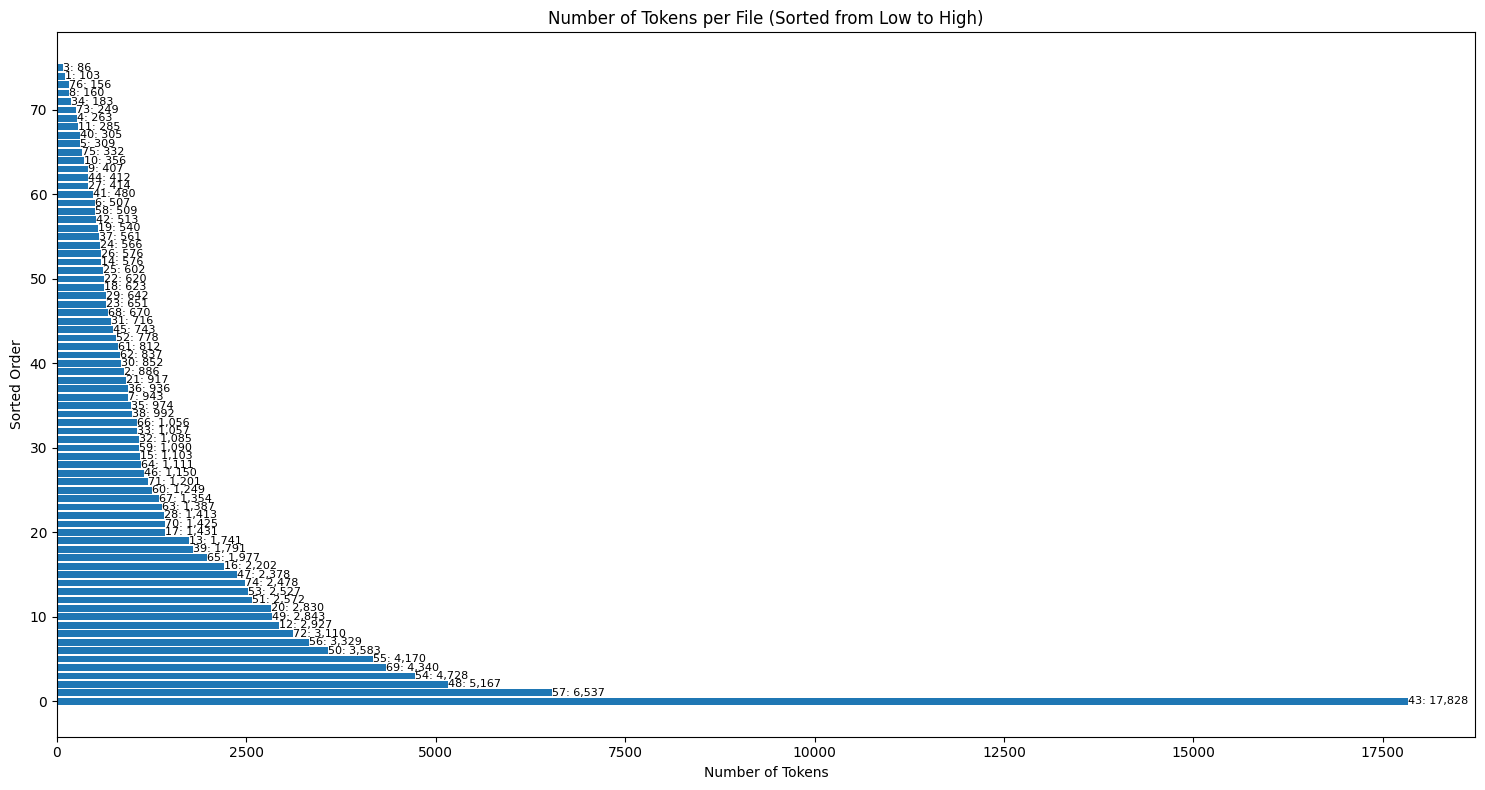

In [17]:
# Biểu đồ 2: Sắp xếp số token từ thấp đến cao
df_sorted = df.sort_values('phobert_count',ascending=False)
plt.figure(figsize=(15, 8))

# Sử dụng biểu đồ ngang thay vì biểu đồ cột dọc
bars = plt.barh(range(len(df_sorted)), df_sorted['phobert_count'])
plt.title('Number of Tokens per File (Sorted from Low to High)')
plt.ylabel('Sorted Order')  # Đổi xlabel thành ylabel
plt.xlabel('Number of Tokens')  # Đổi ylabel thành xlabel

# Vẽ nhãn cho các thanh (bars)
for i, bar in enumerate(bars):
    index = df_sorted['index'].iloc[i]
    token_count = df_sorted['phobert_count'].iloc[i]
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{index}: {token_count:,}', 
             va='center', ha='left', fontsize=8)  # Đổi vị trí ha và va

plt.tight_layout()
plt.show()


In [2]:
import re
import json

def chunk_text(text):
    # Tách văn bản thành các điều
    dieu_pattern = r'Điều (\d+)\.\s+(.*?)(?=Điều \d+\.|\Z)'
    dieu_matches = re.finditer(dieu_pattern, text, re.DOTALL)

    chunks = []

    for dieu_match in dieu_matches:
        dieu_number = dieu_match.group(1)
        dieu_content = dieu_match.group(2).strip()

        # Tách nội dung điều thành các mục
        muc_pattern = r'(\d+)\.\s+(.*?)(?=\d+\.|\Z)'
        muc_matches = re.finditer(muc_pattern, dieu_content, re.DOTALL)

        for muc_match in muc_matches:
            muc_number = muc_match.group(1)
            muc_content = muc_match.group(2).strip()

            # Tách mục thành các submục (nếu có)
            submuc_pattern = r'([a-z])\)\s+(.*?)(?=[a-z]\)|\Z)'
            submuc_matches = re.finditer(submuc_pattern, muc_content, re.DOTALL)

            if submuc_matches:
                for submuc_match in submuc_matches:
                    submuc_letter = submuc_match.group(1)
                    submuc_content = submuc_match.group(2).strip()

                    chunk_id = f"D{dieu_number}_M{muc_number}_P{submuc_letter}"
                    chunk = {
                        "chunk_id": chunk_id,
                        "content": submuc_content,
                        "metadata": {
                            "dieu": f"Điều {dieu_number}",
                            "muc": muc_number,
                            "submuc": submuc_letter,
                            #"keywords": extract_keywords(submuc_content)
                        }
                    }
                    chunks.append(chunk)
            else:
                chunk_id = f"D{dieu_number}_M{muc_number}"
                chunk = {
                    "chunk_id": chunk_id,
                    "content": muc_content,
                    "metadata": {
                        "dieu": f"Điều {dieu_number}",
                        "muc": muc_number,
                        #"keywords": extract_keywords(muc_content)
                    }
                }
                chunks.append(chunk)

    return chunks

def extract_keywords(content):
    # Đây là một hàm đơn giản để trích xuất từ khóa
    # Trong thực tế, bạn có thể sử dụng các phương pháp NLP phức tạp hơn
    words = content.lower().split()
    keywords = [word for word in words if len(word) > 5]
    return list(set(keywords))[:5]  # Chọn 5 từ khóa duy nhất

# Đọc văn bản từ file
with open('D:\DATN\data\hust\Quy chế đào tạo 2023.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tạo chunks
chunks = chunk_text(text)

# Lưu kết quả vào file JSON
with open('chunked_text.json', 'w', encoding='utf-8') as file:
    json.dump(chunks, file, ensure_ascii=False, indent=2)

print(f"Đã tạo {len(chunks)} chunks và lưu vào file chunked_text.json")

Đã tạo 156 chunks và lưu vào file chunked_text.json


In [4]:
from transformers import AutoTokenizer

def count_tokens(text, print_tokens=False):
    # Tải PhoBERT tokenizer
    tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

    # Tokenize văn bản
    tokens = tokenizer.encode(text, add_special_tokens=False)

    # In ra các token nếu được yêu cầu
    if print_tokens:
        print("Tokens:")
        for token in tokens:
            print(f"  {tokenizer.decode([token])}")

    # Trả về số lượng token
    return len(tokens)

# Ví dụ sử dụng
text = """QUY CHẾ ĐÀO TẠO (Ban hành kèm theo Quyết định số 4600/QĐ–ĐHBK ngày 09 tháng 6 năm 2023 của Giám đốc Đại học Bách khoa Hà Nội) 
CHƯƠNG I NHỮNG QUY ĐỊNH CHUNG
Điều 1. Phạm vi điều chỉnh và đối tượng áp dụng
1. Quy chế này quy định về công tác đào tạo đối với các khóa đào tạo theo hình thức chính quy, vừa làm vừa học và cấp văn bằng cử nhân, kỹ sư, thạc sĩ hoặc tiến sĩ của Đại học Bách khoa Hà Nội (sau đây gọi tắt là ĐHBK Hà Nội). Những vấn đề không được đề cập đến trong Quy chế này sẽ được áp dụng theo các quy chế đào tạo do Bộ Giáo dục và Đào tạo (Bộ GDĐT) ban hành 1 2 3.
2. Quy chế này áp dụng cho sinh viên đại học, học viên của chương trình thạc sĩ và nghiên cứu sinh (sau đây gọi chung là người học) của ĐHBK Hà Nội.
3. Các đơn vị cấp 2 thuộc ĐHBK Hà Nội được giao nhiệm vụ thực hiện công tác đào tạo được gọi tắt là trường/khoa."""
token_count = count_tokens(text, print_tokens=True)
print(f"Số token: {token_count}")

c:\Users\PC\anaconda3\envs\raptop_env\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Tokens:
  QU@@
  Y
  CH@@
  Ế
  Đ@@
  ÀO
  T@@
  Ạ@@
  O
  (@@
  Ban
  hành
  kèm
  theo
  Quyết
  định
  số
  46@@
  00@@
  /@@
  QĐ@@
  –@@
  ĐH@@
  BK
  ngày
  09
  tháng
  6
  năm
  2023
  của
  Giám
  đốc
  Đại
  học
  Bách
  khoa
  Hà
  Nộ@@
  i@@
  )
  CH@@
  ƯƠNG
  I
  NH@@
  Ữ@@
  NG
  QU@@
  Y
  Đ@@
  ỊNH
  CH@@
  U@@
  NG@@
  <unk>
  Điều
  1.
  Phạm
  vi
  điều
  chỉnh
  và
  đối
  tượng
  áp
  dụ@@
  ng@@
  <unk>
  1.
  Quy
  chế
  này
  quy
  định
  về
  công
  tác
  đào
  tạo
  đối
  với
  các
  khó@@
  a
  đào
  tạo
  theo
  hình
  thức
  chính
  quy@@
  ,
  vừa
  làm
  vừa
  học
  và
  cấp
  văn
  bằng
  cử
  nhâ@@
  n@@
  ,
  kỹ
  sư@@
  ,
  th@@
  ạc
  sĩ
  hoặc
  tiến
  sĩ
  của
  Đại
  học
  Bách
  khoa
  Hà
  Nội
  (@@
  sau
  đây
  gọi
  tắt
  là
  ĐH@@
  BK
  Hà
  Nộ@@
  i@@
  ).
  Những
  vấn
  đề
  không
  được
  đề
  cập
  đến
  trong
  Quy
  chế
  này
  sẽ
  được
  áp
  dụng
  theo
  các
  quy
  chế
  đào
  tạo
  do
  Bộ
  Giáo
  dục
  và
  Đào
  tạo
  (@@
 